In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

In [2]:
df = pd.read_csv('data/AirPassengers.csv')

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.Month = pd.to_datetime(df.Month, infer_datetime_format=True)

df.set_index(['Month'], inplace=True)

In [4]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


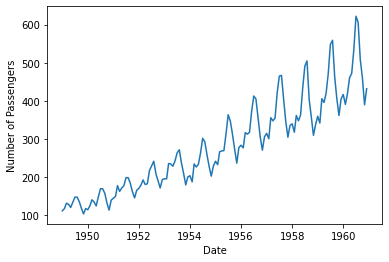

In [6]:
# Plot a Graph
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.show()

**NOTE:** It has a trend(upward), also mean and std is not constant so it is not stationary.

Two Check to find out the Stationarity: `Rolling Statistics` and `ADCF(Augemented Dickey Fuller Test)`.

### Rolling Statistics

In [9]:
# Determining Rolling Statistics
roll_mean = df.rolling(window=12).mean()
roll_std = df.rolling(window=12).std()

print(roll_mean)
print('\n')
print(roll_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


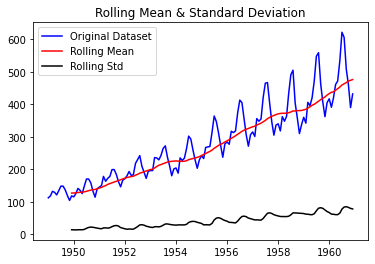

In [10]:
# Plot Rolling Statistics
orig = plt.plot(df, color="blue", label="Original Dataset")
mean = plt.plot(roll_mean, color="red", label="Rolling Mean")
std = plt.plot(roll_std, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

**CHECK 1:** We can see that the mean is not constant and increasing, same with the standard deviation. There is also a trend going on here. So we can say this is non stationary dataset.

### Dickey Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")
df_test = adfuller(df, autolag='AIC') # Akaike Information Criterion

df_output = pd.Series(df_test[:4], index=['Test Statistic', 'P-value', '# Lags Used', '# Observation Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
    
print(df_output)

Results of Dickey-Fuller Test:
Test Statistic            0.815369
P-value                   0.991880
# Lags Used              13.000000
# Observation Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


**NOTE:** 
P-value should be less around 50% (Prob that the data is not stationary).
Test Stats should be less than critical value for rejection the null hypothesis(i.e. Data is not Stationary).

Here we fail to reject null hypothesis as `Dickey Fuller` Test shows that the data is not stationary.

**Next Steps:** We try to make data stationary.

### Estimating the trend using log scale

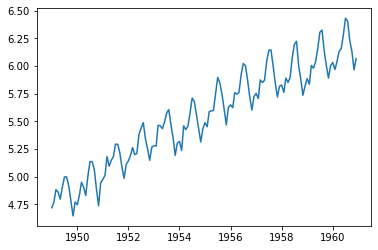

In [19]:
# Estimating the trend
df_logscale = np.log(df)
plt.plot(df_logscale)
plt.show()

In [20]:
# Determining Rolling Statistics
roll_mean_logscale = df_logscale.rolling(window=12).mean()
roll_std_logscale = df_logscale.rolling(window=12).std()

print(roll_mean_logscale)
print('\n')
print(roll_std_logscale)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     6.124517
1960-09-01     6.132246
1960-10-01     6.142628
1960-11-01     6.148837
1960-12-01     6.154215

[144 rows x 1 columns]


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     0.171453
1960-09-01     0.174172
1960-10-01     0.169804
1960-11-01     0.160923
1960-12-01     0.156660

[144 rows x 1 columns]


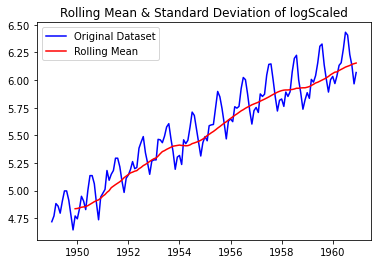

In [22]:
# Plot Rolling Statistics
orig = plt.plot(df_logscale, color="blue", label="Original Dataset")
mean = plt.plot(roll_mean_logscale, color="red", label="Rolling Mean")
# std = plt.plot(roll_std_logscale, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation of logScaled")
plt.show()

**NOTE:** Better than the previous one, standard deviation becomes constant.
But still the data is stationary.

**NEXT STEPS:** Take the difference between the roll mean and the actual number of passenger on logscale.

### Transfomation: Rolling Mean

In [29]:
diff_logscale_rollmean = df_logscale - roll_mean_logscale
print(diff_logscale_rollmean.head(12))

print('\n')
# Remove NaN Values
diff_logscale_rollmean.dropna(inplace=True)
print(diff_logscale_rollmean.head(12))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    -0.065494


            #Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142
1950-05-01    -0.027529
1950-06-01     0.139881
1950-07-01     0.260184
1950-08-01     0.248635
1950-09-01     0.162937
1950-10-01    -0.018578
1950-11-01    -0.180379


In [30]:
def test_stationarity(ts):
    # Determining rolling stats
    roll_mean_logscale = ts.rolling(window=12).mean()
    roll_std_logscale = ts.rolling(window=12).std()
    
    # Plot rolling stats
    orig = plt.plot(ts, color="blue", label="Original Dataset")
    mean = plt.plot(roll_mean_logscale, color="red", label="Rolling Mean")
    std = plt.plot(roll_std_logscale, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation of logScaled")
    plt.show()
    
    # Perform Dickey Fuller Test:
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(ts, autolag='AIC') # Akaike Information Criterion

    df_output = pd.Series(df_test[:4], index=['Test Statistic', 'P-value', '# Lags Used', '# Observation Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value

    print(df_output)

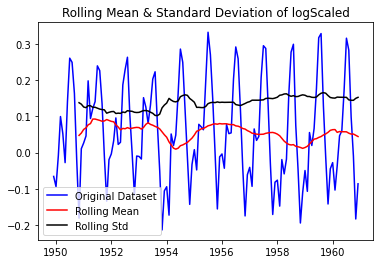

Results of Dickey-Fuller Test:
Test Statistic           -3.162908
P-value                   0.022235
# Lags Used              13.000000
# Observation Used      119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [31]:
test_stationarity(diff_logscale_rollmean)

**NOTE:** Now the data doesn't show trend and also mean std is quite constant.
Dickey-Fuller test also gives satisfactory result as test-stats is quite similar to critical value, we can reject the Null Hypothesis.

Now our data is stationary and can be used in different modelling.

### Transformation: Weighted Avergae of Time Series

To see the trend present inside the time series data

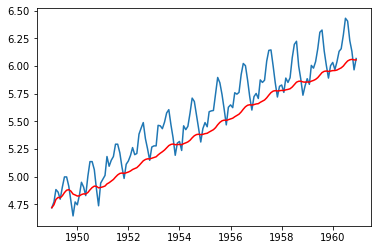

In [34]:
exp_decay_weighted_avg = df_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exp_decay_weighted_avg, color='red')
plt.show()

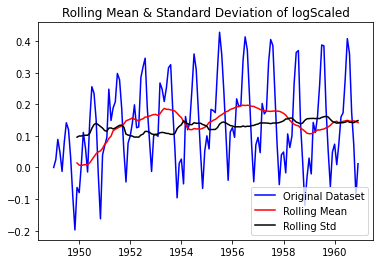

Results of Dickey-Fuller Test:
Test Statistic           -3.601262
P-value                   0.005737
# Lags Used              13.000000
# Observation Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [35]:
# Another transformation
diff_logscale_weighted_avg = df_logscale - exp_decay_weighted_avg
test_stationarity(diff_logscale_weighted_avg)

**NOTE:** We can apply both transformation to check whether your data is stationary or not.

Now we know that our data is stationary, we shift the values in time series so that we can use it in the forecast

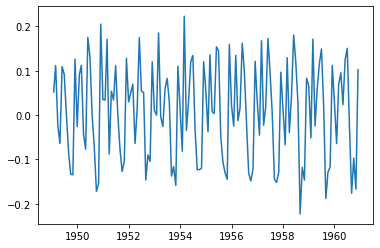

In [40]:
df_logscale_shift = df_logscale - df_logscale.shift()
plt.plot(df_logscale_shift)
plt.show()

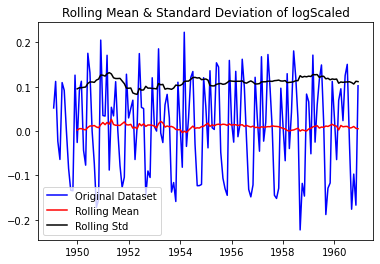

Results of Dickey-Fuller Test:
Test Statistic           -2.717131
P-value                   0.071121
# Lags Used              14.000000
# Observation Used      128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [47]:
df_logscale_shift.dropna(inplace=True)
test_stationarity(df_logscale_shift)

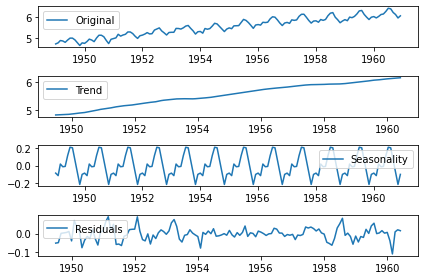

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logscale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

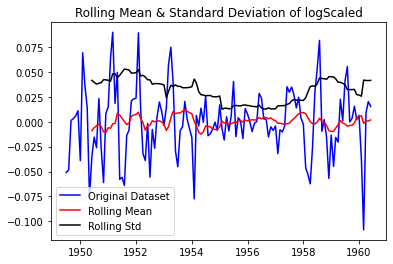

Results of Dickey-Fuller Test:
Test Statistic         -6.332387e+00
P-value                 2.885059e-08
# Lags Used             9.000000e+00
# Observation Used      1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [51]:
df_logscale_resid = residual
df_logscale_resid.dropna(inplace=True)
test_stationarity(df_logscale_resid)